In [ ]:
#Loading and Explaoring data

import pandas as pd
df=pd.read_csv("customer_churn.csv")
print(df.head())
print(df.isnull().sum())
print(df.info())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [ ]:
#Data cleaning and preprocessing

df.drop(["RowNumber","Surname","Geography"],axis=1,errors="ignore",inplace=True)
df.fillna(df.select_dtypes(include=["number"]).mean(),inplace=True)

In [ ]:
#Data cleaning and preprocessing

if "Gender" in df.columns:
    df["Gender"]=df["Gender"].map({"Male":1,"Female":0})
print(df.head())

   CustomerId  CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  \
0    15634602          619       0   42       2       0.00              1   
1    15647311          608       0   41       1   83807.86              1   
2    15619304          502       0   42       8  159660.80              3   
3    15701354          699       0   39       1       0.00              2   
4    15737888          850       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  


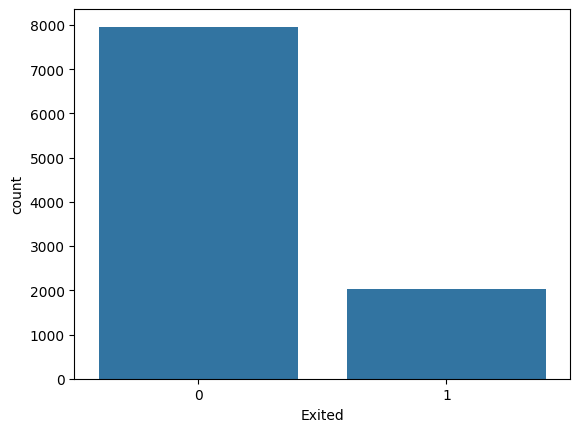

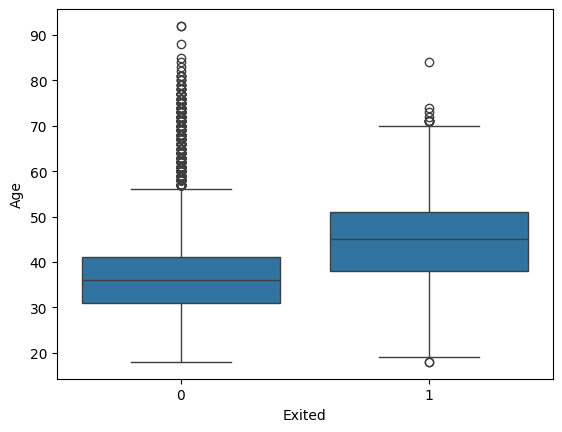

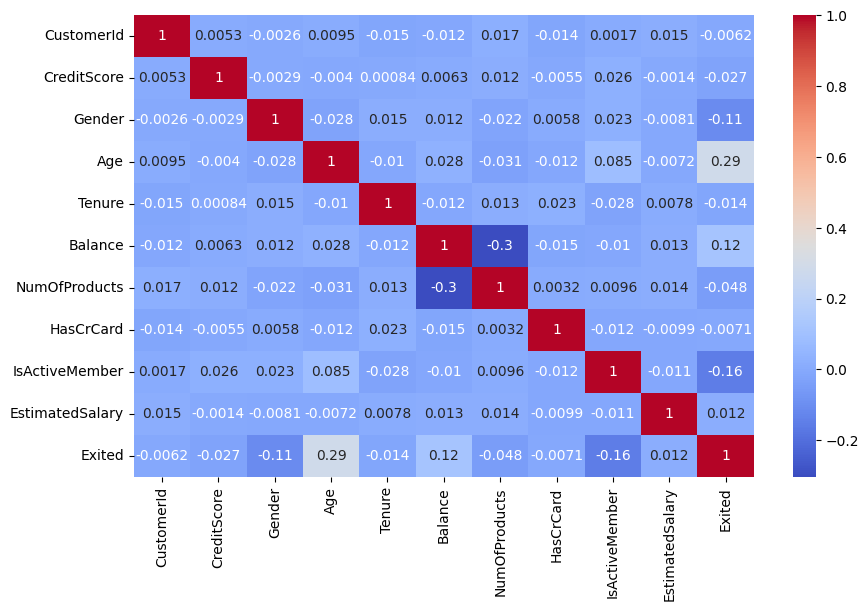

In [ ]:
#Exploratory Data Analysis

import matplotlib.pyplot as plt
import seaborn as sns

if "Exited" in df.columns:
    sns.countplot(x="Exited", data=df)
    plt.show()
else:
    print("Column 'Exited' not found in the dataset.")


if "Exited" in df.columns and "Age" in df.columns:
    sns.boxplot(x="Exited", y="Age", data=df)
    plt.show()
else:
    print("Columns 'Exited' or 'Age' not found in the dataset.")


plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
#Feature Engineering

from sklearn.model_selection import train_test_split

X = df.drop("Exited", axis=1)
y = df["Exited"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

Training size: (8000, 10)
Testing size: (2000, 10)


In [ ]:
#Model Selection and Training

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.865
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.44      0.56       393

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.74      2000
weighted avg       0.86      0.86      0.85      2000



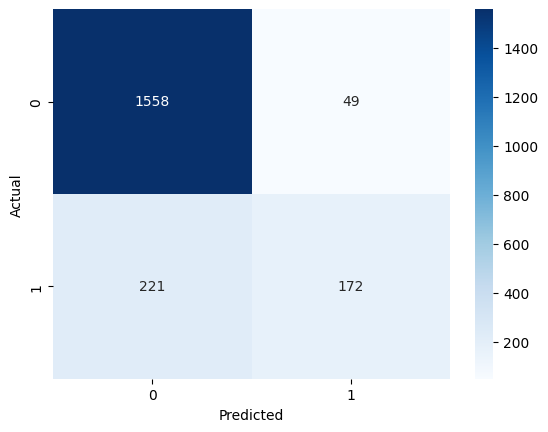

In [ ]:
#Model evaluation

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

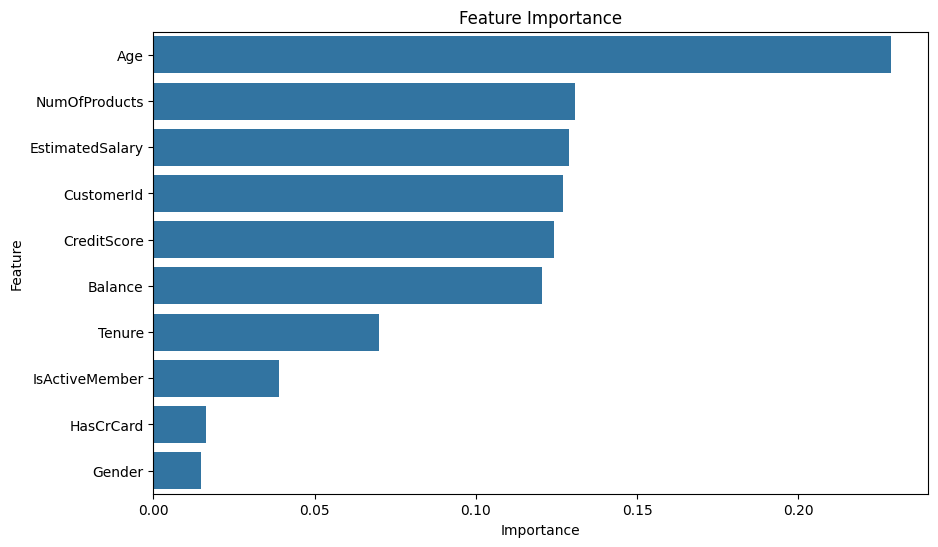

In [ ]:
# Feature Importance Analysis
importances = model.feature_importances_
feature_names = X.columns


feat_importance = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_importance.sort_values(by="Importance", ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_importance)
plt.title("Feature Importance")
plt.show()

In [ ]:
#understanding columns for inserting new data
print(X_train.columns)

Index(['CustomerId', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [ ]:
#Model Evaluation for newly give data

import pandas as pd
import numpy as np

feature_names = X_train.columns
new_data = pd.DataFrame(np.array([[600, 1, 35, 5, 15000, 0, 1, 50000, 1, 0]]), columns=feature_names)
prediction = loaded_model.predict(new_data)
print("Churn Prediction:",prediction)


Churn Prediction: [1]


In [ ]:
#Model Evaluation for newly give data
import pandas as pd
import numpy as np

feature_names = X_train.columns
new_data = pd.DataFrame(np.array([[600, 1000, 35000, 5000, 15000000, 0, 1, 500000000, 1, 0]]), columns=feature_names)
prediction = loaded_model.predict(new_data)
print("Churn Prediction:",prediction)

Churn Prediction: [0]


In [45]:
#Checking the accuracy
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.86
